In [429]:
import pandas as pd
import numpy as np
from gekko import GEKKO
import seaborn as sns
import matplotlib.pyplot as plt

In [568]:
# Importing data from the finalized data set
df1=pd.read_excel('smooth_interp.xlsx',header=0,index_col=0)
df1.head()
df1=df1.reset_index()
df= df1.drop('minute',axis=1)
df= df.drop('index',axis=1)
df.head()


tons /hr  Feed_water  Mill_speed    Cyc_flow  Sump_water     Mill_BP1  \
0  102.462509   15.509874   15.160000  525.208252   50.587109  6104.048340   
1  103.333893   16.375196   15.160000  529.151917   54.062538  6108.159180   
2  103.808968   16.706270   15.160000  527.527954   43.480278  6085.975586   
3  102.219231   17.050024   15.156041  520.946472   37.862888  6116.854980   
4  102.523087   16.613831   15.150989  520.562073   38.544147  6100.854492   

   Mill_power  Sump_level  Cyc_density  Cyc_pressure      D50C  
0      2151.0   40.304512    54.255432     11.241975  0.117296  
1      2155.0   43.349667    54.202900     11.241036  0.117299  
2      2160.0   46.226486    54.150364     11.240097  0.117301  
3      2153.0   38.813515    54.099995     11.239159  0.117303  
4      2162.0   34.497410    54.051334     11.238220  0.117305

In [492]:
40.3*0.9+43.3*0.1

40.599999999999994

In [569]:

def alpha_filter(data, alpha):
    alpha=1-alpha
    """
    Applies an alpha filter to a Pandas DataFrame time series.
    
    Parameters:
        data (DataFrame): The input time series data.
        alpha (float): The alpha value used in the filter.
    
    Returns:
        DataFrame: The filtered time series data.
    """
    # Create an empty DataFrame to hold the filtered data
    filtered_data = pd.DataFrame(columns=data.columns)
    
    # Apply the alpha filter to each column in the data
    for col in data.columns:
        filtered_col = [data[col].iloc[0]]
        for i in range(1, len(data)):
            filtered_val = alpha * data[col].iloc[i] + (1 - alpha) * filtered_col[-1]
            filtered_col.append(filtered_val)
        filtered_data[col] = filtered_col
    
    return filtered_data


df6= alpha_filter(df,0.58)

In [553]:
df1001.to_excel('a4.xlsx',header=True,index=False)


In [570]:
df6.head()

tons /hr  Feed_water  Mill_speed    Cyc_flow  Sump_water     Mill_BP1  \
0  102.462509   15.509874   15.160000  525.208252   50.587109  6104.048340   
1  102.828490   15.873310   15.160000  526.864591   52.046789  6105.774893   
2  103.240291   16.223153   15.160000  527.143204   48.448854  6097.459184   
3  102.811446   16.570439   15.158337  524.540576   44.002749  6105.605418   
4  102.690335   16.588663   15.155251  522.869605   41.710136  6103.610029   

    Mill_power  Sump_level  Cyc_density  Cyc_pressure      D50C  
0  2151.000000   40.304512    54.255432     11.241975  0.117296  
1  2152.680000   41.583477    54.233369     11.241581  0.117297  
2  2155.754400   43.533541    54.198507     11.240958  0.117299  
3  2154.597552   41.551130    54.157132     11.240202  0.117301  
4  2157.706580   38.588567    54.112697     11.239370  0.117302

In [470]:
dd=pd.DataFrame(dfa['Sump_level'])

dfa['Sump_level']=alpha_filter(dd,0.1)
#could filter just the sump level data some more
dfa.head()

tons /hr  Feed_water  Mill_speed    Cyc_flow  Sump_water     Mill_BP1  \
0  102.462509   15.509874   15.160000  525.208252   50.587109  6104.048340   
1  102.636786   15.682939   15.160000  525.996985   51.282195  6104.870508   
2  102.871222   15.887605   15.160000  526.303179   49.721811  6101.091523   
3  102.740824   16.120089   15.159208  525.231837   47.350027  6104.244215   
4  102.697276   16.218837   15.157564  524.297884   45.588851  6103.566270   

   Mill_power  Sump_level  Cyc_density  Cyc_pressure      D50C  
0   2151.0000   40.304512    54.255432     11.241975  0.117296  
1   2151.8000   40.365415    54.244926     11.241787  0.117297  
2   2153.4400   40.526487    54.226013     11.241449  0.117298  
3   2153.3520   40.608199    54.200810     11.240991  0.117299  
4   2155.0816   40.544816    54.170915     11.240437  0.117300

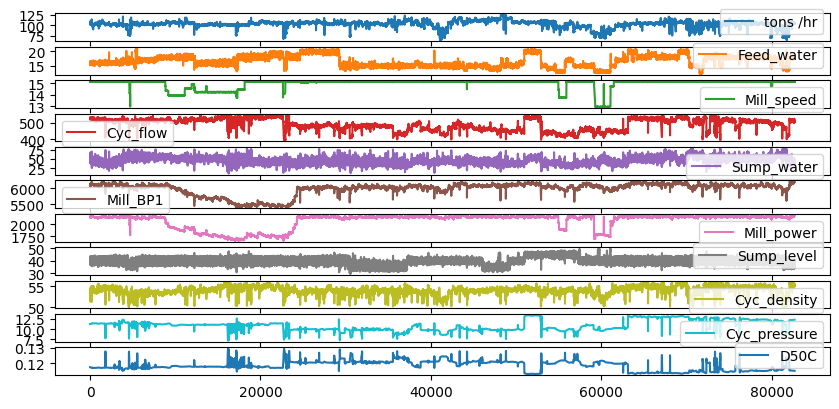

In [557]:
df6.plot(kind='line',subplots=True,layout=(14,1),figsize=(10,6))
plt.show()
#smoothed:

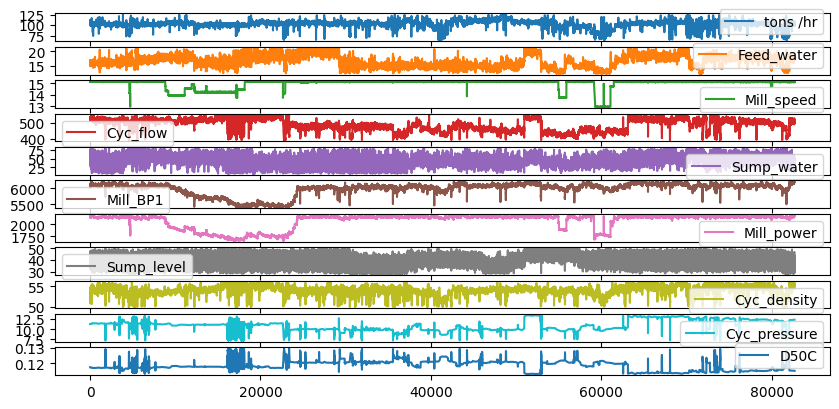

In [364]:
df.plot(kind='line',subplots=True,layout=(14,1),figsize=(10,6))
plt.show()
#smoothed:

In [87]:
#df.drop(columns=['Unnamed: 0'], inplace=True)
#df=df.set_index('minute')
#df=df.reset_index()
#df=df.drop('minute',axis=1)

In [571]:

#Pay Attention


df6.columns = [ 'F', 'FW', 'MS', 'PS', 'SW','BP', 'P', 'SL', 'D', 'CP', 'D50']

df2=df6.copy()

In [3]:
# for col in df.columns:
#     df = df.loc[df[col]>=0]


In [572]:
###Scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
import pandas as pd

data = df2.copy()
# Split into train and test subsets (30% for test)

train, test = train_test_split(data, test_size=1, shuffle=False)


s = StandardScaler() #RobustScaler()
dfs=df.copy()
s_train = s.fit_transform(train)  #whole dataframe ppossilbe


# print('a: ', s.scale_)
# print('Scaler mean')
# print('b: ', s.mean_)


s_test = s.fit_transform(test)


# convert scaled values back to dataframe  
#This is a scaled training and test dataset

s_trained = pd.DataFrame(s_train, columns=train.columns.values,index=train.index) #train index if partial
s_test_df = pd.DataFrame(s_test, columns=test.columns.values,index=test.index)




#Standard scaler

#s_trained.iloc[40000:].plot(kind='kde',subplots=True,layout=(6,2),figsize=(10,6))
#plt.show()


In [575]:
#training split
#or other scaler
df=[]
#df = df2.iloc[0:40000]   split half
df = s_trained.copy() #   split second half

In [574]:
#rolling median

df['SL']=pd.DataFrame(df['SL']).rolling(window=3,center=True).mean() #.plot(kind='line',figsize=(10,6))  #subplots=True,layout=(12,1),
df=df.dropna()
#df=df[::3]


In [576]:

MVs = ['F', 'FW', 'MS', 'PS', 'SW']
CVs = ['BP', 'P', 'SL', 'D', 'CP', 'D50']

# dfs = df.iloc[25000:25500].copy()
# dfs = df.copy()

dfs = df[MVs+CVs].copy()

# y0 = dfs.iloc[0].to_numpy()
y0 = dfs.mean().to_numpy()

# dfs -= y0
t = list(range(0, len(dfs)))



In [577]:
m = GEKKO(remote=False)
yp, p, K = m.sysid(t=t, u=dfs[MVs+CVs], y=dfs[CVs], nk= 0, scale= True, pred='meas', shift='mean')

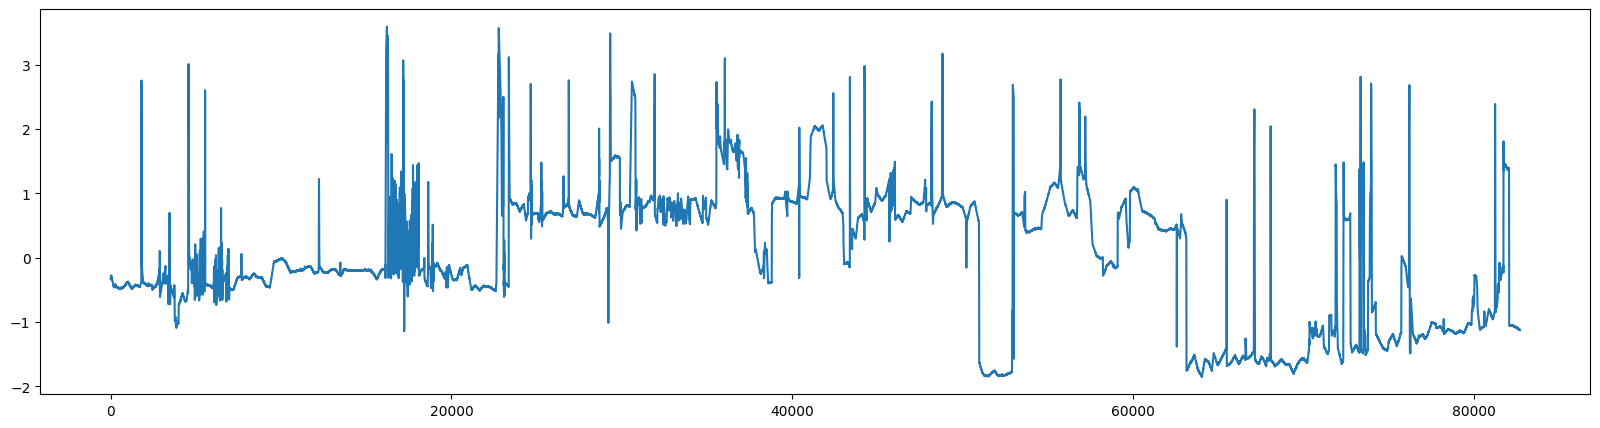

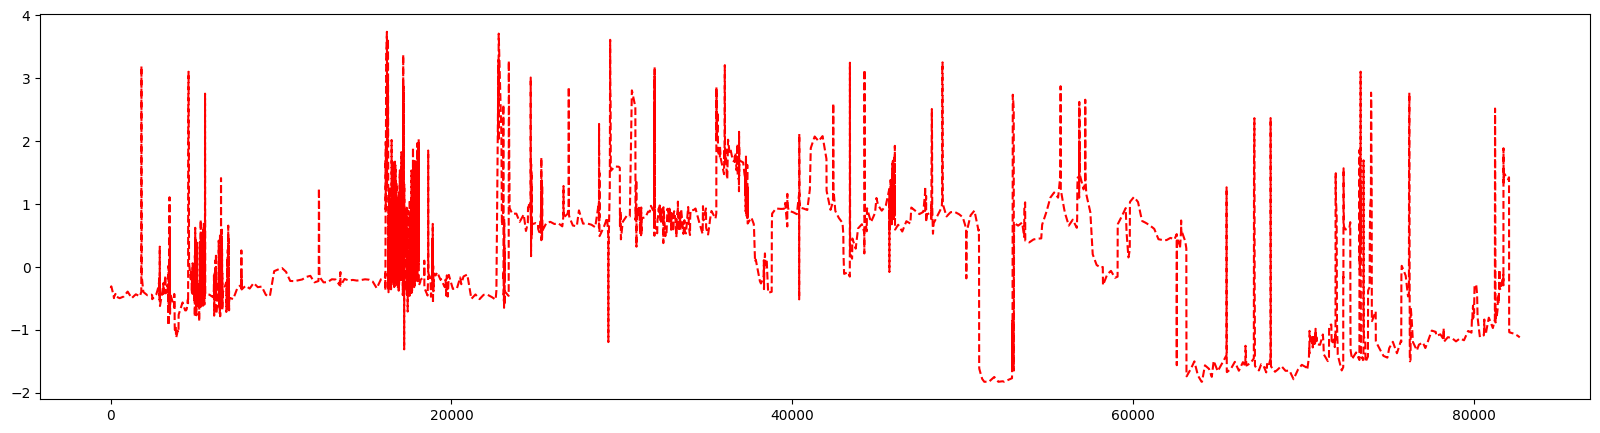

In [578]:
plt.figure(0,figsize=(20,5))
plt.plot(yp[:, len(CVs)-1])
plt.figure(1,figsize=(20,5))
plt.plot(dfs[CVs[-1]].to_numpy(), 'r--')
plt.show()

NameError: name 'yp' is not defined

In [342]:
# plt.figure(0,figsize=(20,5))
# plt.plot(yp[:, len(CVs)-1])
# plt.figure(1,figsize=(20,5))
# plt.plot(dfs[CVs[-1]].to_numpy(), 'r--')
# plt.show()

In [579]:
step = {}
for cv_i in CVs:
    step[cv_i] = {}
    
step_u = (dfs.max()-dfs.min())*0.01
# step_u = pd.DataFrame(np.ones((1,len(dfs.columns))), columns=dfs.columns)
# step_u[step_u.columns] = 1


for idx_mv, mv_i in enumerate(MVs):

    m2 = GEKKO(remote=False)
    y, u = m2.arx(p)

    m2.options.imode = 1
    #m2.options.nodes = 3

    # simulate
    m2.solve(disp=False)
    
    tf = 20

    u_f = np.zeros(tf)
    for u_i in u:
        u_i.value = u_f.copy()

    u[idx_mv].value[2:] = step_u[mv_i]
    
    # options
    m2.time = np.linspace(0,tf,tf)
    m2.options.imode = 4
    m2.options.nodes = 2

    # simulate
    m2.solve(disp=False)
    
    for idx_cv, cv_i in enumerate(CVs):
        step[cv_i][mv_i] = y[idx_cv].value

In [355]:
#MVs=[MVs+CVs]
#MVs=MVs[0]
#MVs

['BP', 'P', 'SL', 'D', 'CP', 'D50']

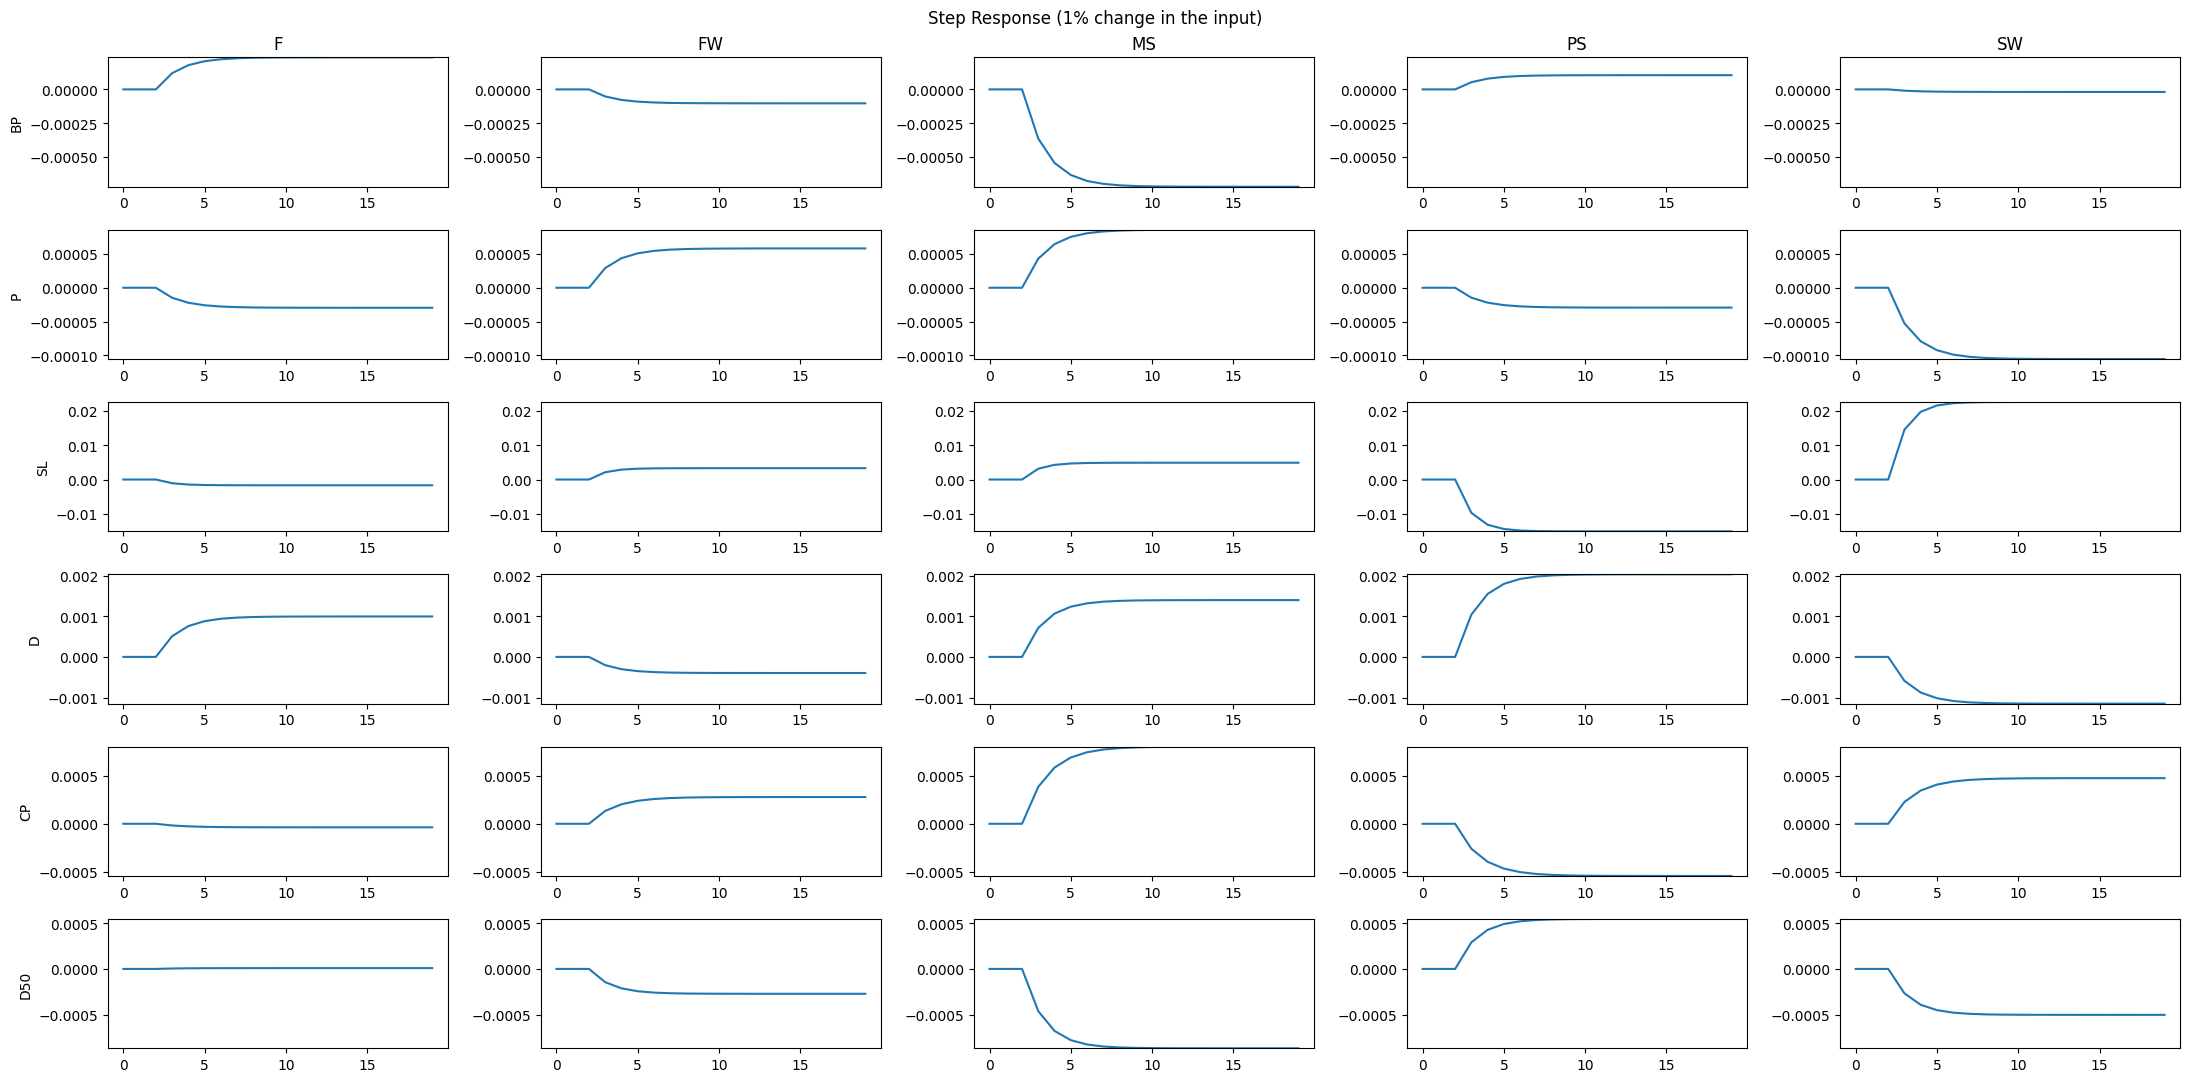

In [580]:
n_mv = len(MVs)
n_cv = len(CVs)

# cv Min/Max
min_ = {}
max_ = {}

for idx_cv, cv_i in enumerate(CVs):
    min_[cv_i] = min(min(step[cv_i].values())) + y0[n_mv+idx_cv]*0.999
    max_[cv_i] = max(max(step[cv_i].values())) + y0[n_mv+idx_cv]*1.001

    
cnt = 1
i = 1
j = 1

plt.subplots(n_cv,n_mv,figsize=(22,11))

for idx_cv, cv_i in enumerate(CVs):
    #if cv_i == 'RW':
    #    continue
    for mv_i in MVs:
        plt.subplot(n_cv, n_mv, cnt)
        # plt.plot(step[cv_i][mv_i])
        plt.plot(step[cv_i][mv_i] + y0[n_mv+idx_cv])

        plt.ylim(min_[cv_i], max_[cv_i])
        if not (i-1)%n_mv:
            plt.ylabel(cv_i)
        if not (j-1)%n_cv:
            plt.title(mv_i)
        i += 1  
        cnt += 1
        
    j += 1
    
plt.suptitle('Step Response (1% change in the input)')
plt.tight_layout()
plt.savefig('step_test.jpg', dpi=300, format='jpg')
plt.show()

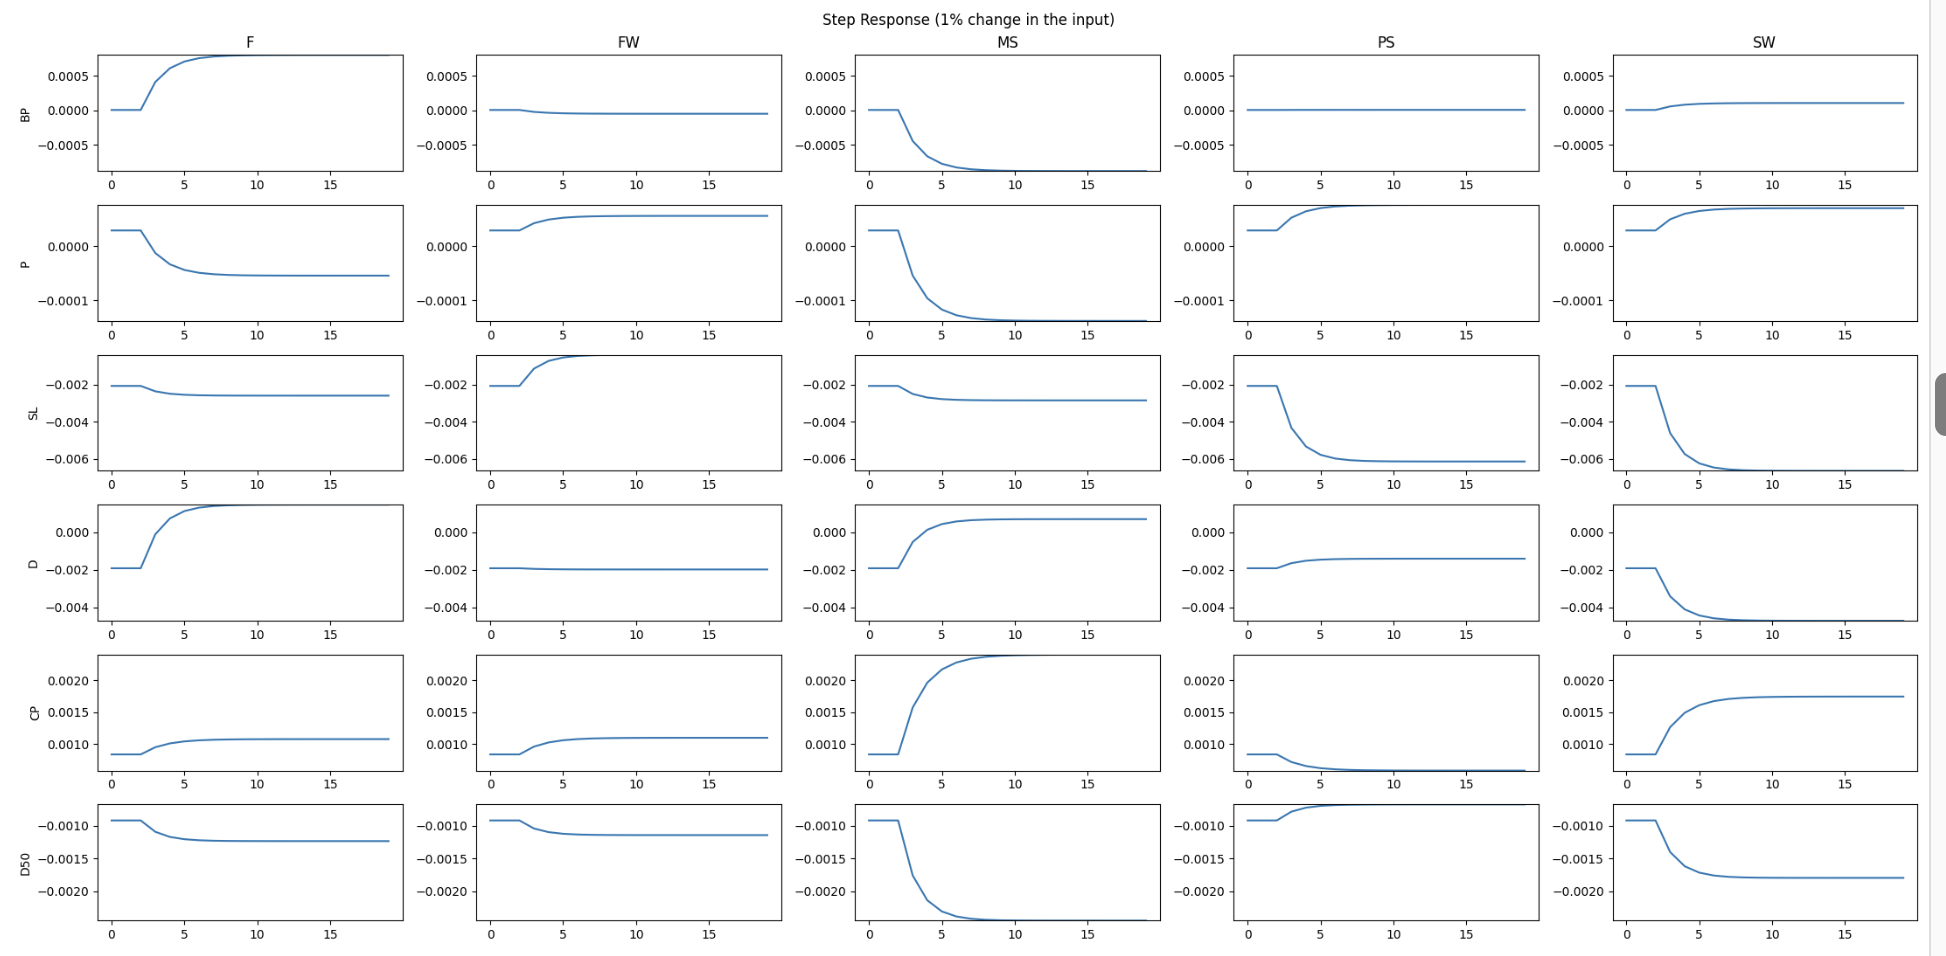

In [581]:
gain_matrix = []
for cv_i in CVs:
    cv_list = []
    
    for mv_i in MVs:
        cv_list.append( (step[cv_i][mv_i][-1]-step[cv_i][mv_i][0])/(step_u[mv_i]) )
        
    gain_matrix.append(cv_list)
    
gain_df = pd.DataFrame(gain_matrix, columns=MVs, index=CVs)
gain_df.T

BP         P        SL         D        CP       D50
F   0.003391 -0.000423 -0.023897  0.014229 -0.000532  0.000127
FW -0.002248  0.001271  0.071921 -0.008655  0.006097 -0.005942
MS -0.014432  0.001723  0.097861  0.028025  0.016159 -0.017404
PS  0.002412 -0.000673 -0.345049  0.046613 -0.012494  0.012545
SW -0.000245 -0.001377  0.294282 -0.015024  0.006222 -0.006563

## 0.58 filter
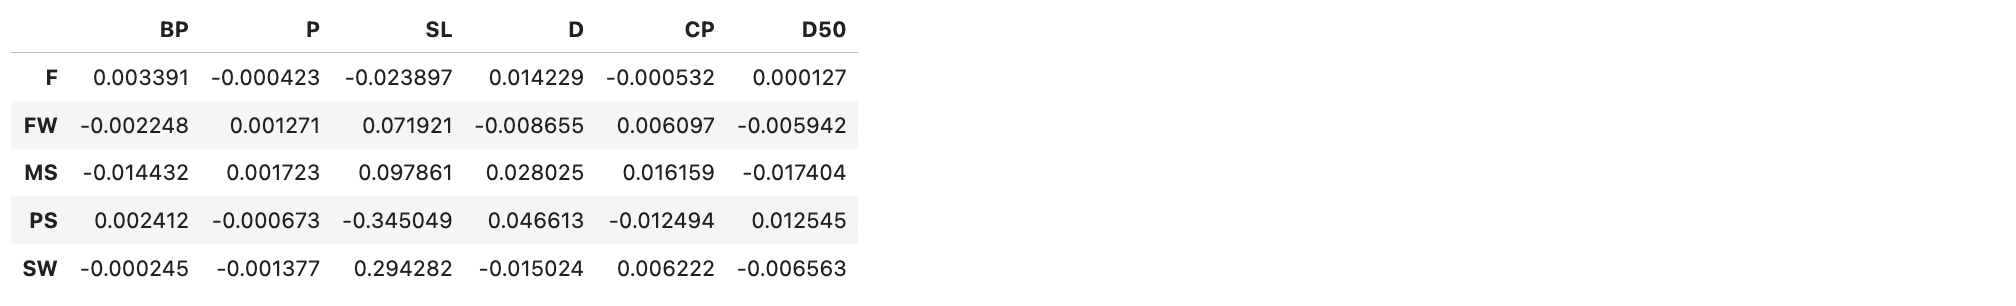

## rolling 5 with 0.8 alpha filter
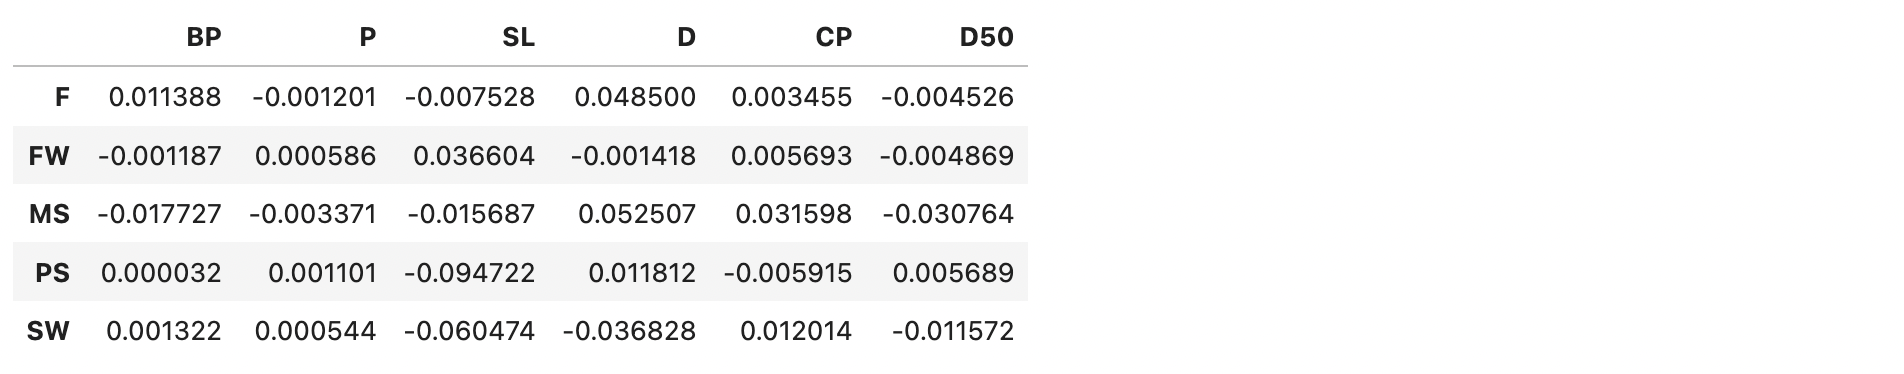
## no roll 0.6 alpha
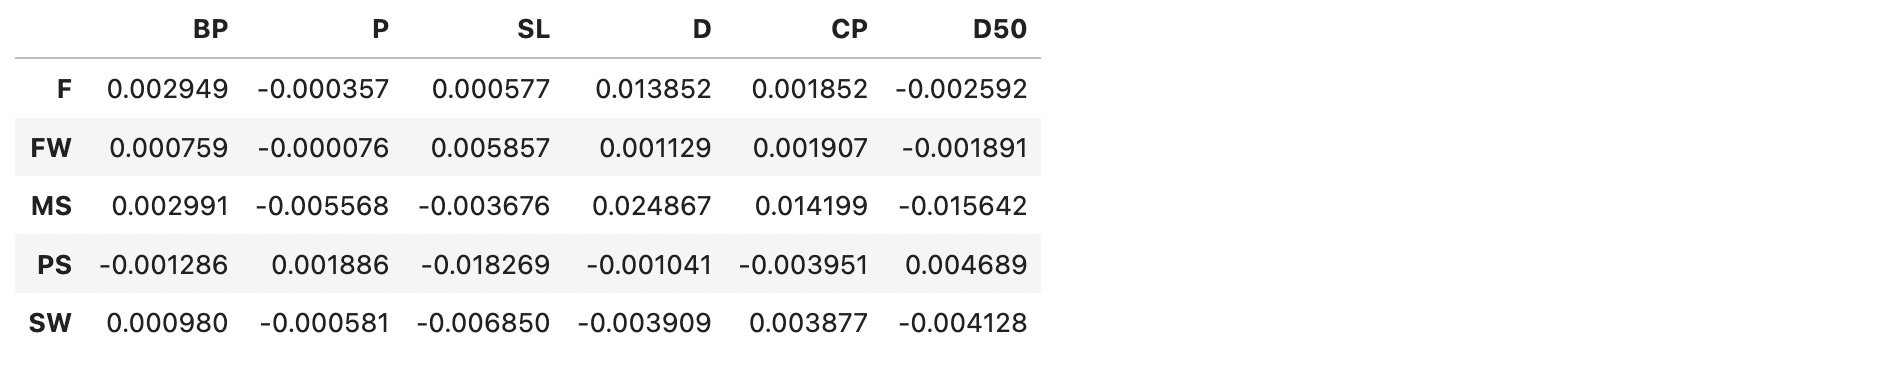

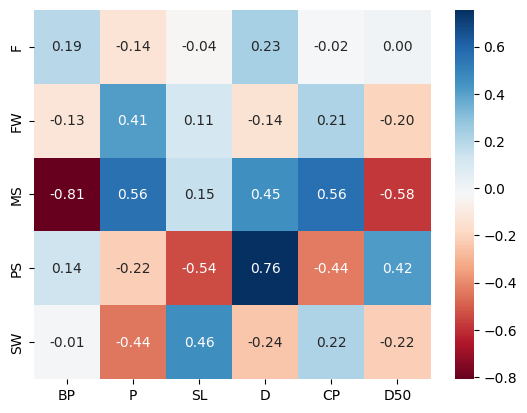

In [582]:
gain_df=gain_df.T
gain_df=gain_df/(gain_df.max()-gain_df.min())
sns.heatmap(gain_df,cmap='RdBu',annot=True, fmt='.2f')
plt.show()

# alpha 0.6 no rolling

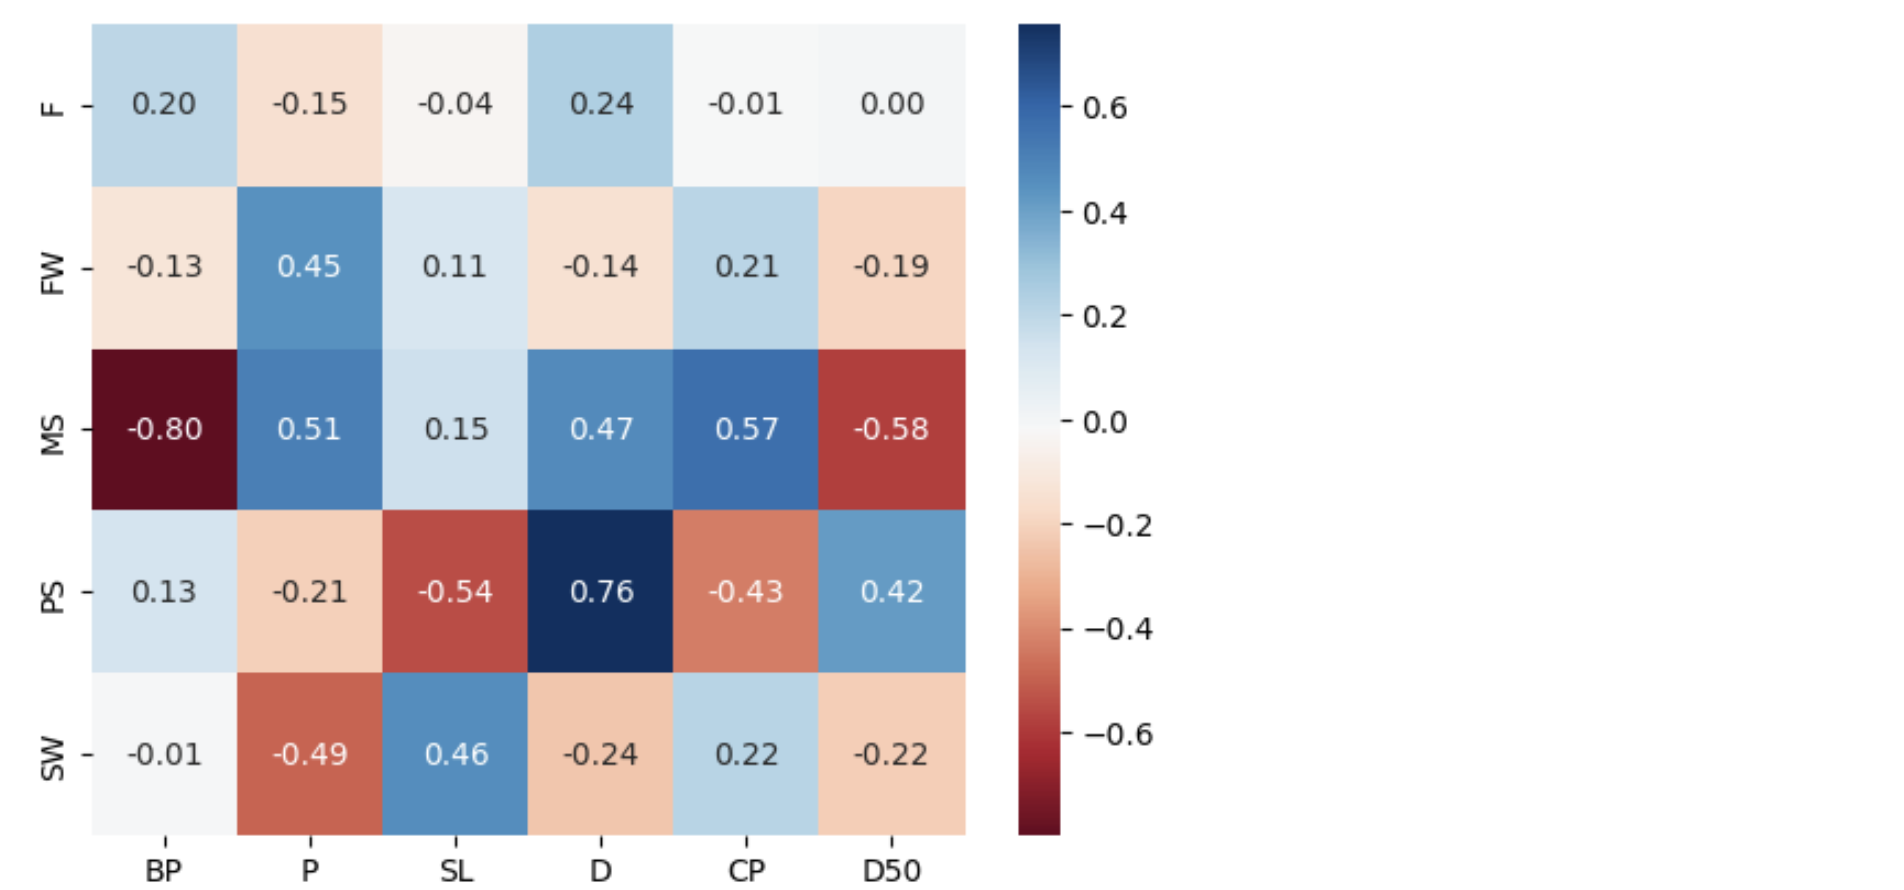

# alpha 0.8  rolling 5

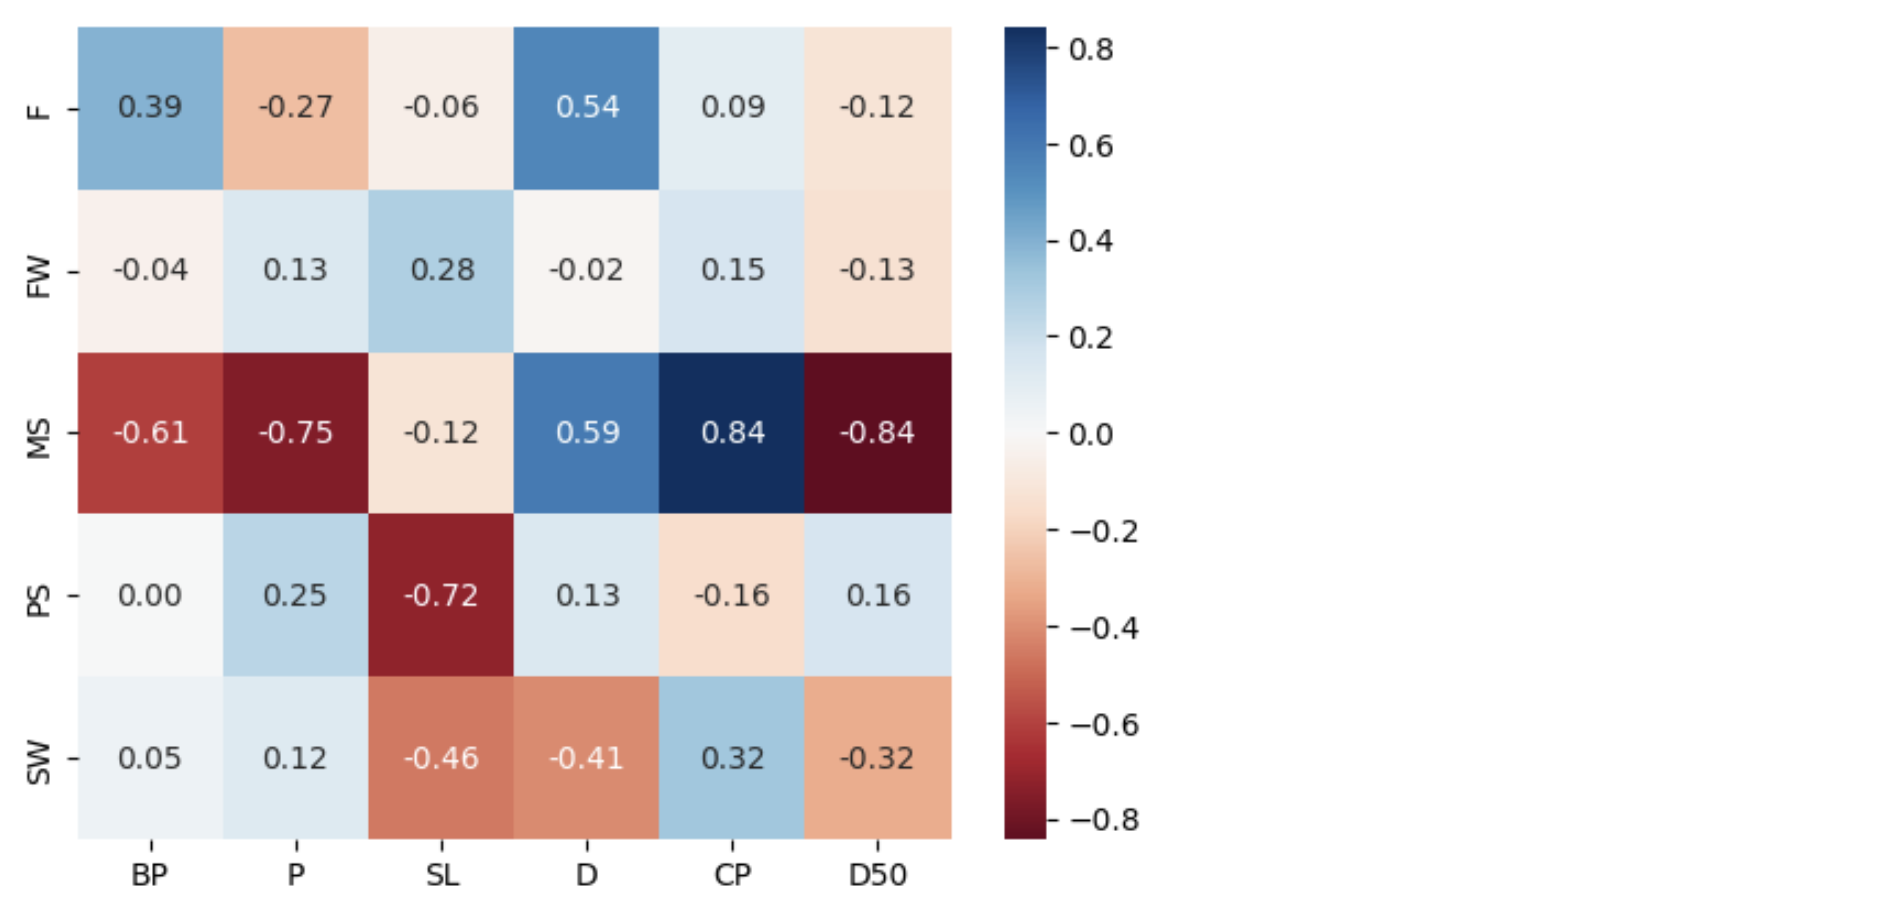

## rolling 15
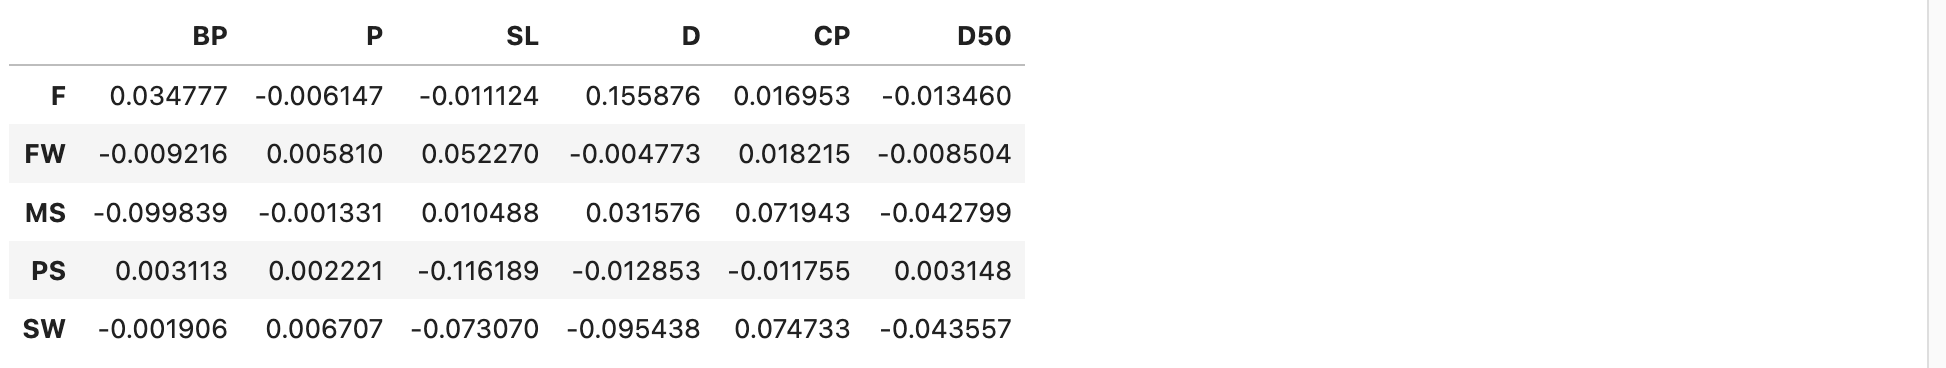


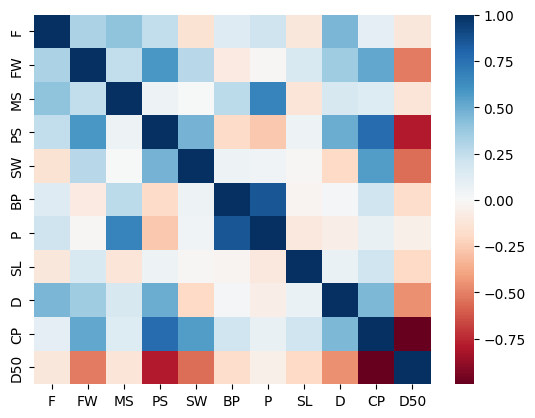

In [346]:
sns.heatmap(df.corr(),cmap='RdBu')
plt.show()
#15

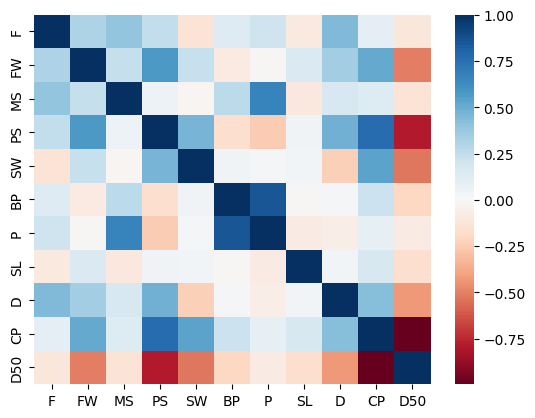

In [583]:
sns.heatmap(df.corr(),cmap='RdBu')
plt.show()
#15

## Every 15th median (30 min)
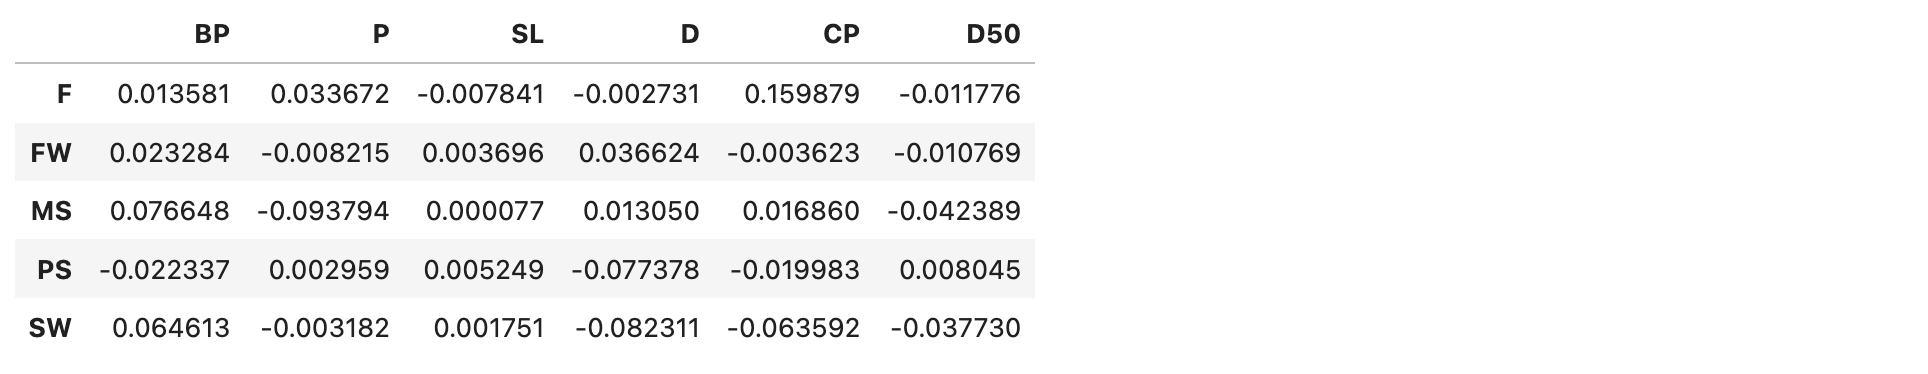

## every 49 th median
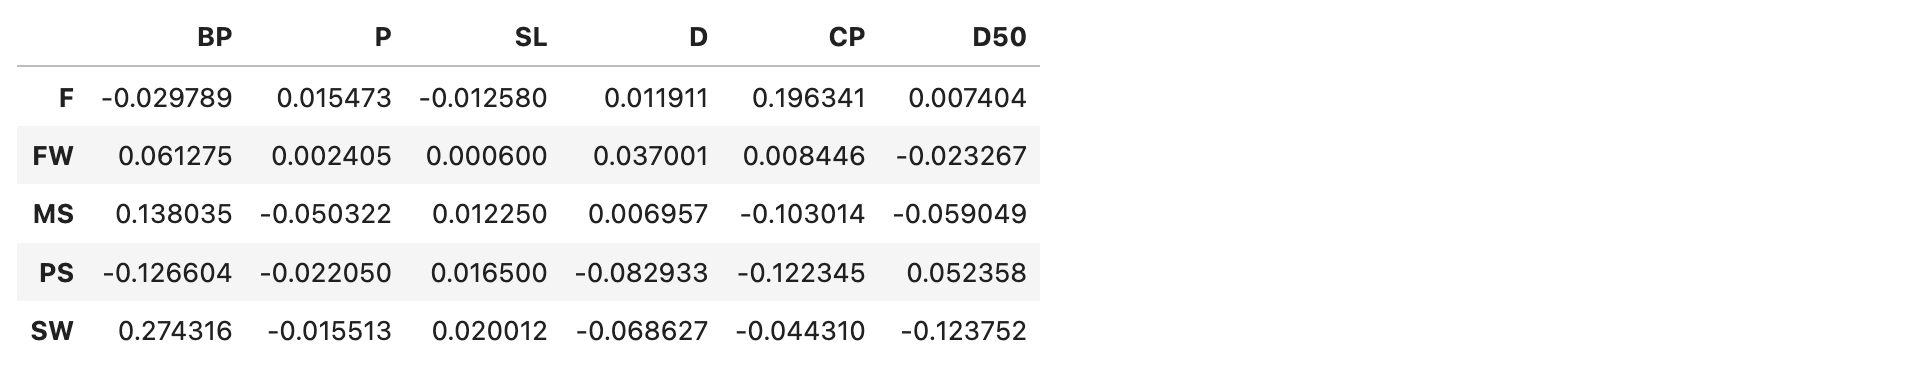

## real 7 median 7th point 
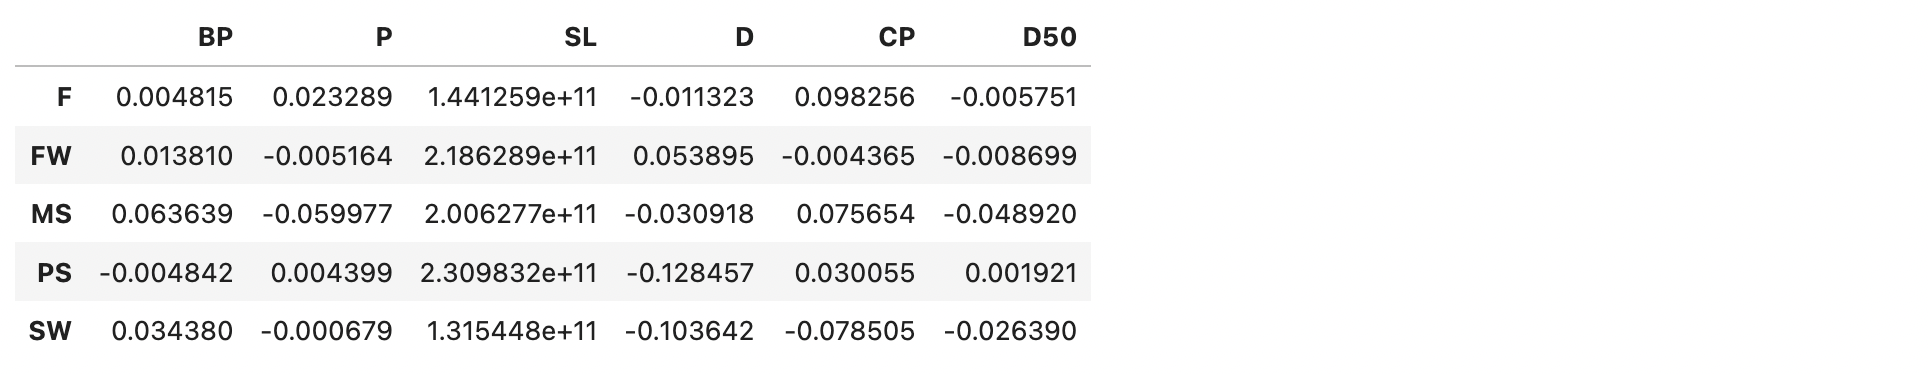

## super median of medians 
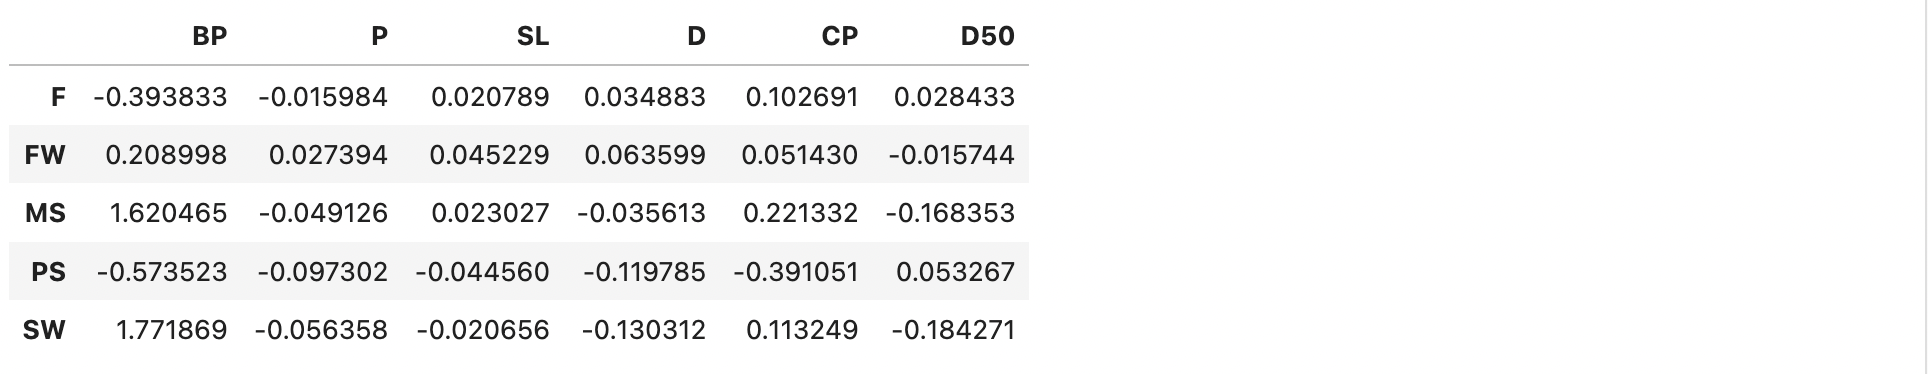

## rolling median of 7 no error
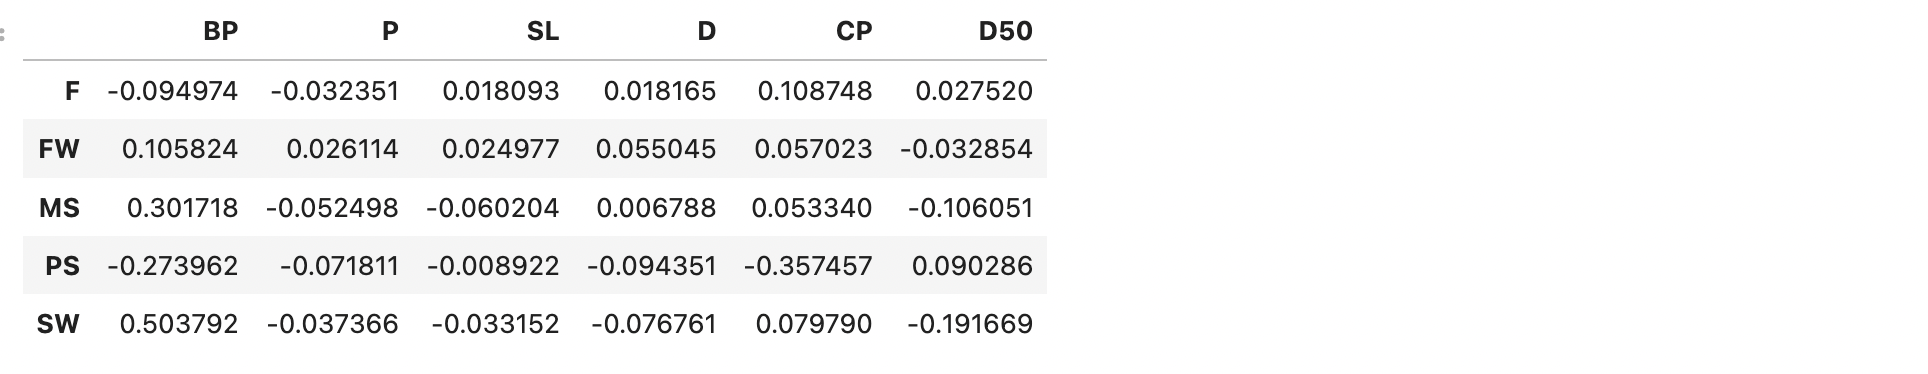

## nk=1 is now 3 time steps
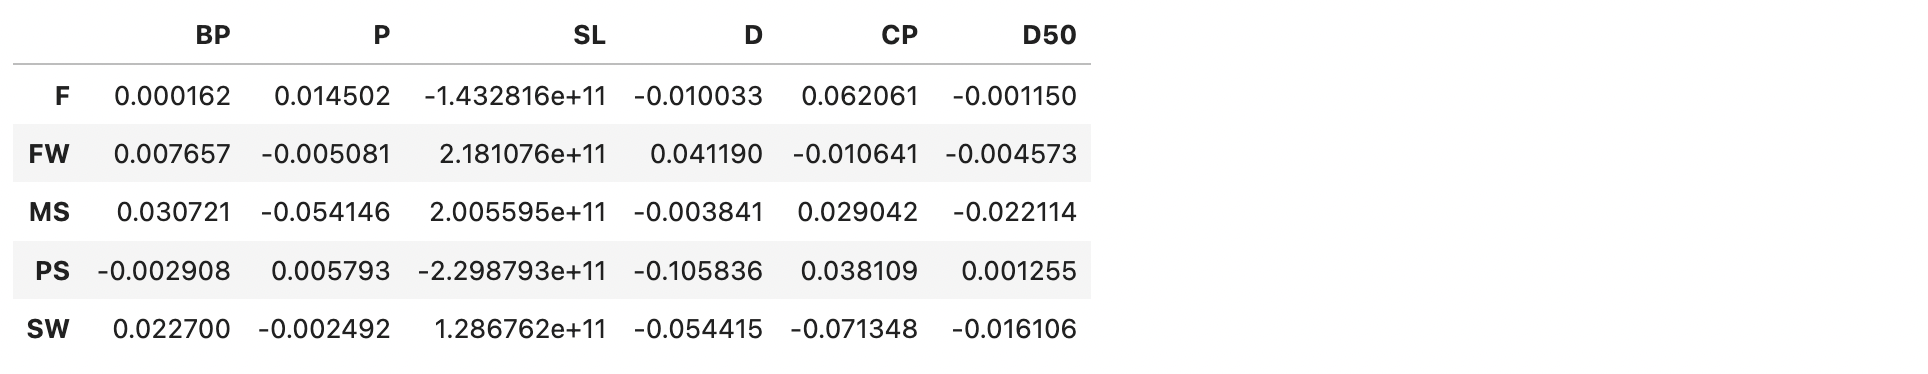

## with every 3 as a median of each around it. min max doesnt matter
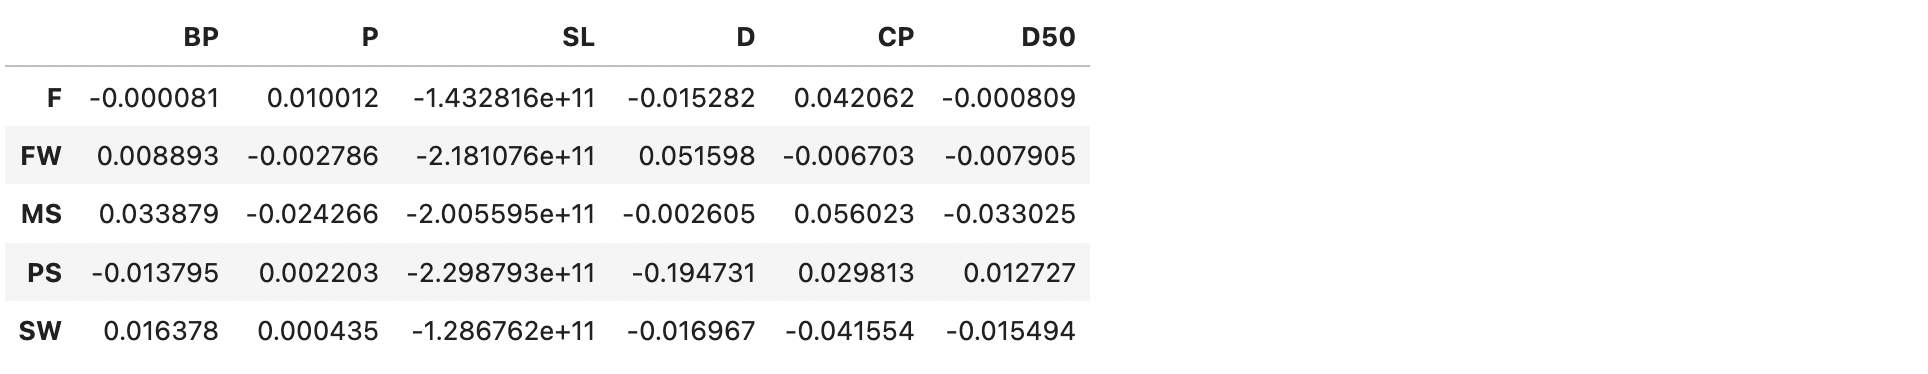

## nk=6 and minmax scale = True
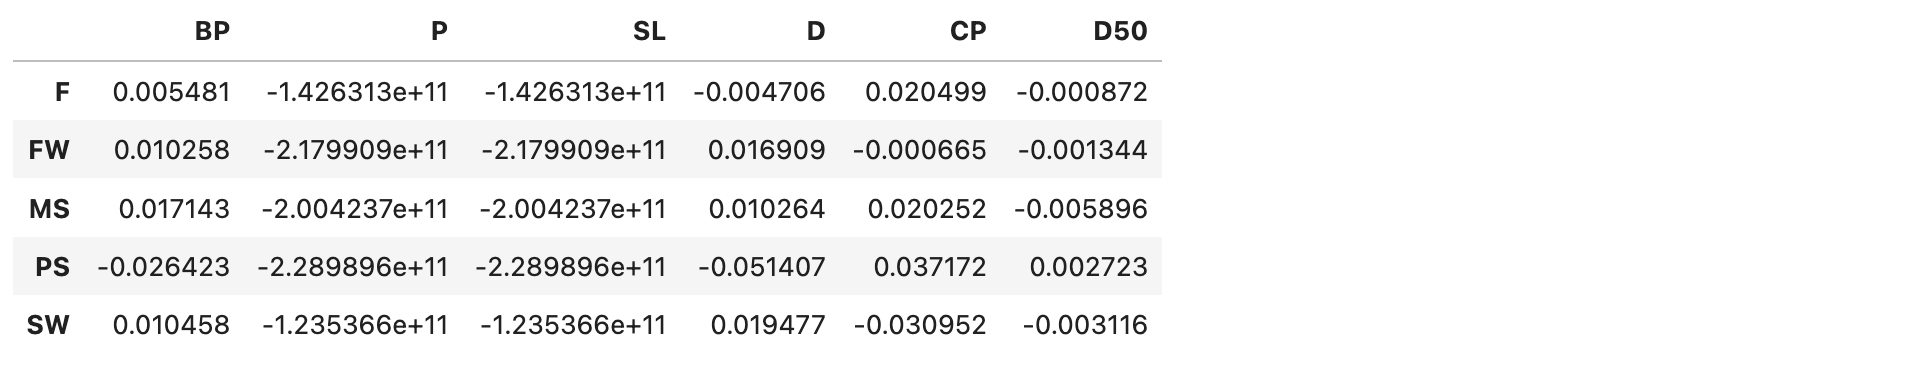

## nk=6
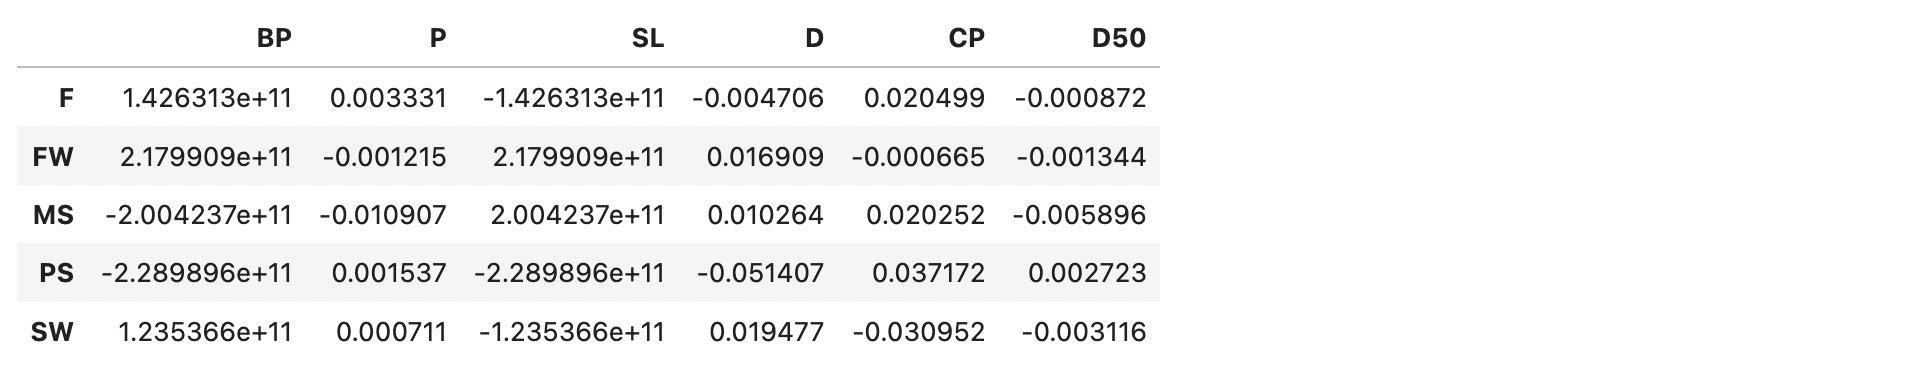

## nk=3
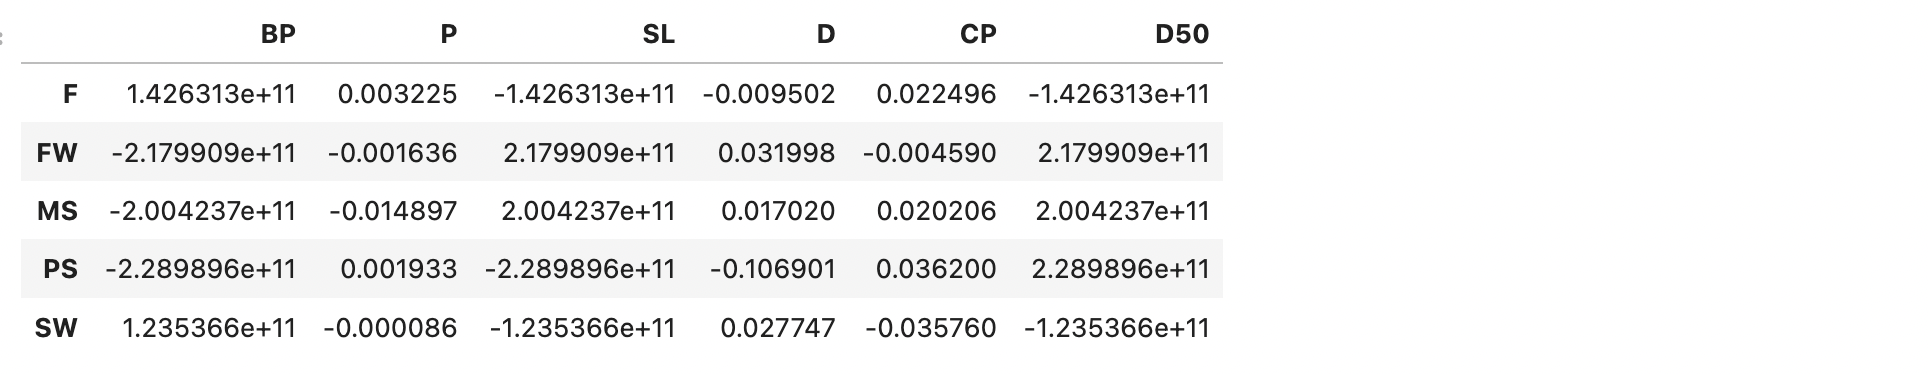

## nk=1 
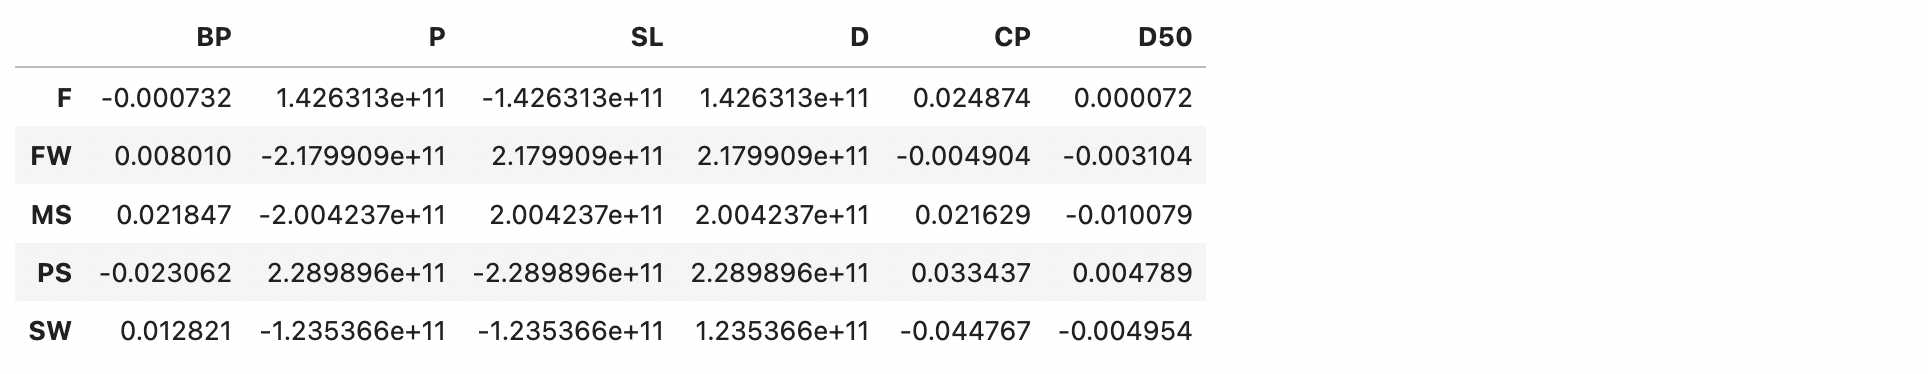

## scaled normal, scale =False. not minmax scaled 
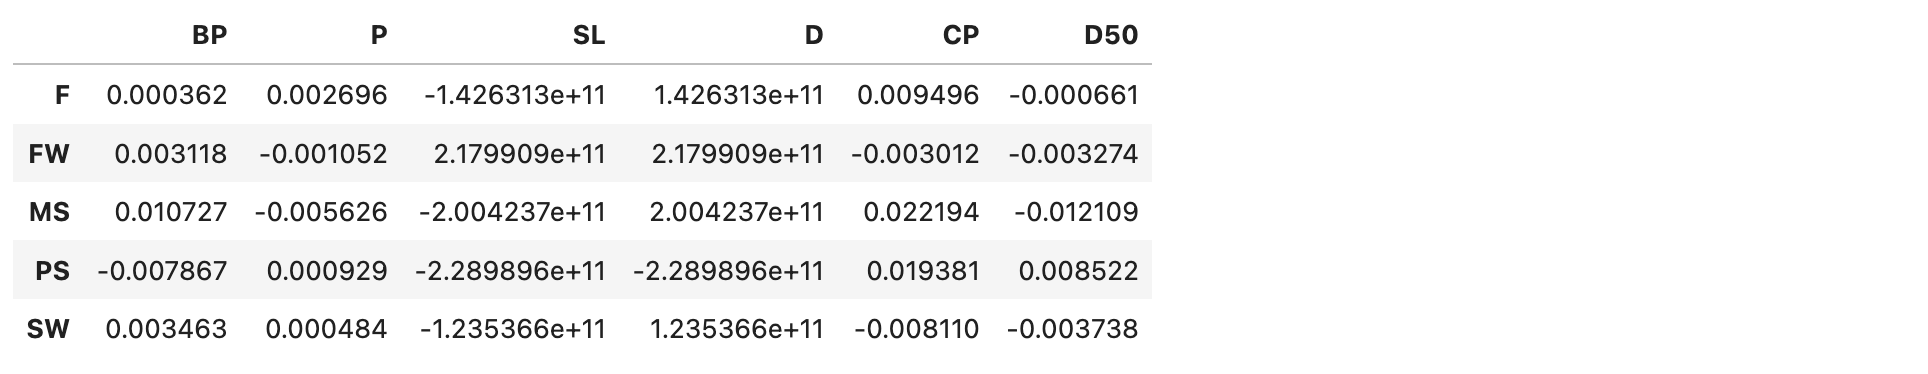

## Scaled normal first

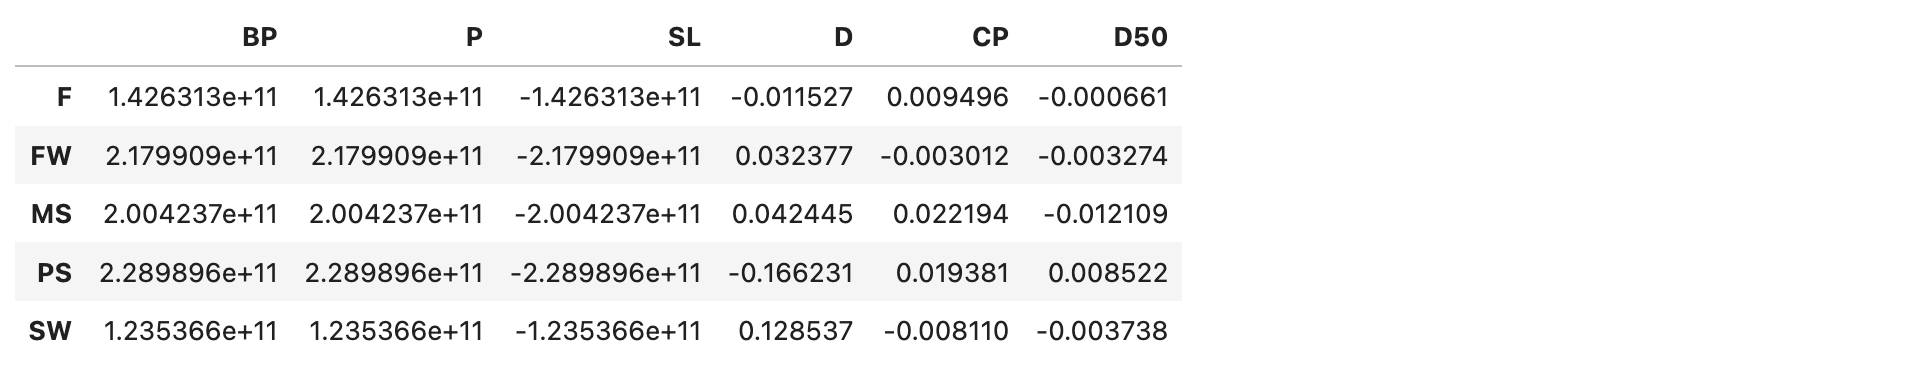

## scale = true
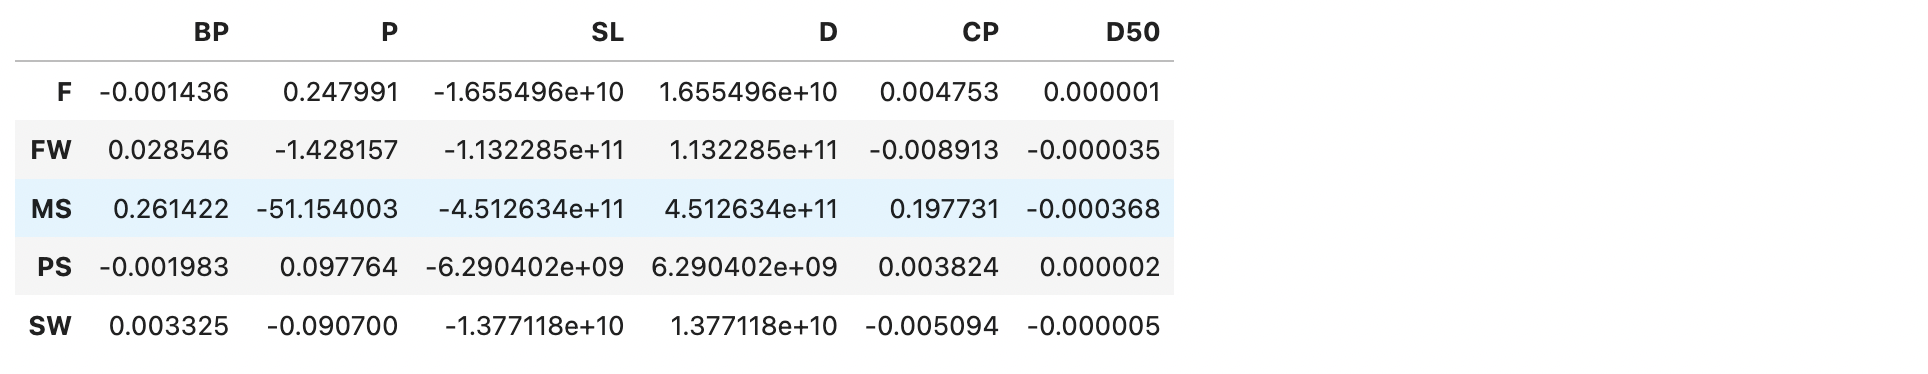

## all smooth interp
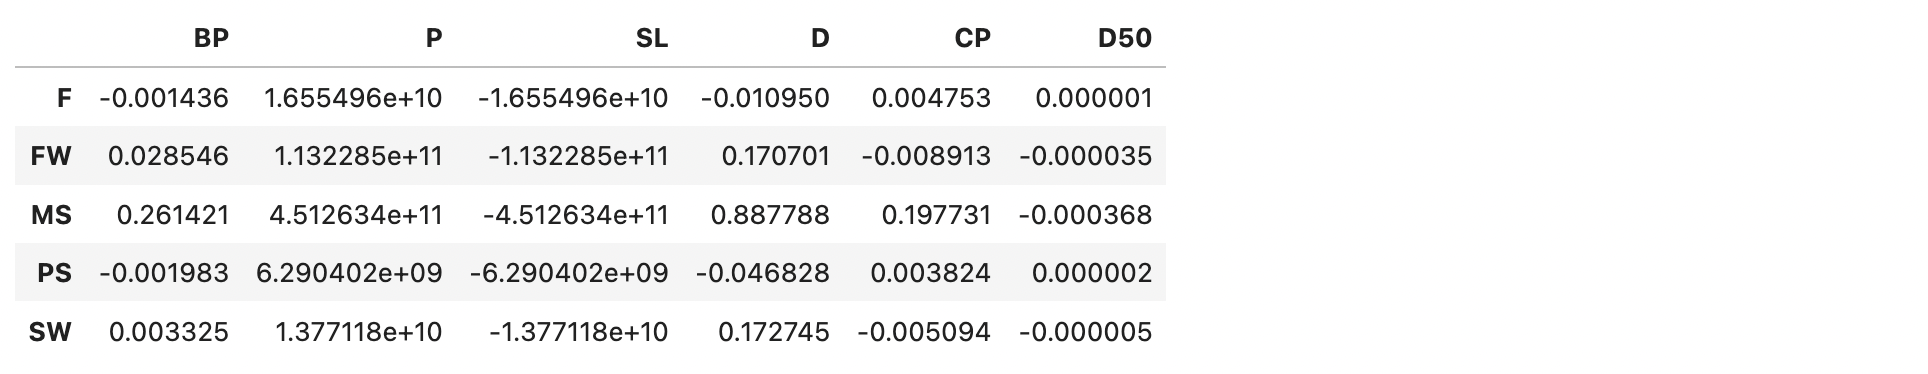

## 6-50 k
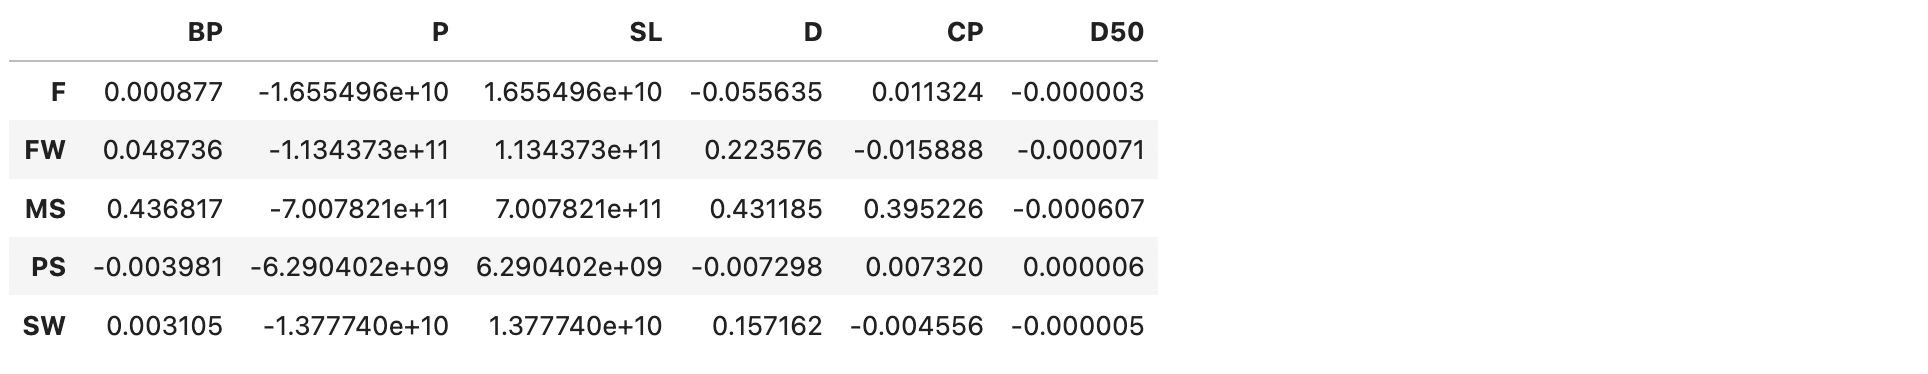

## 6-24 k
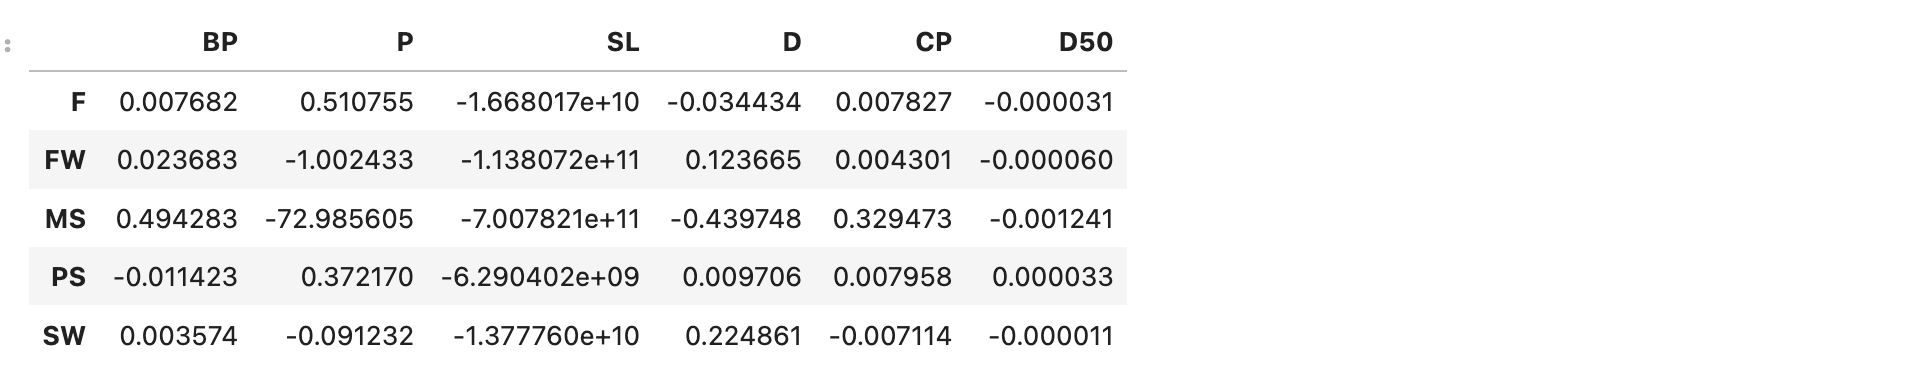

##previous

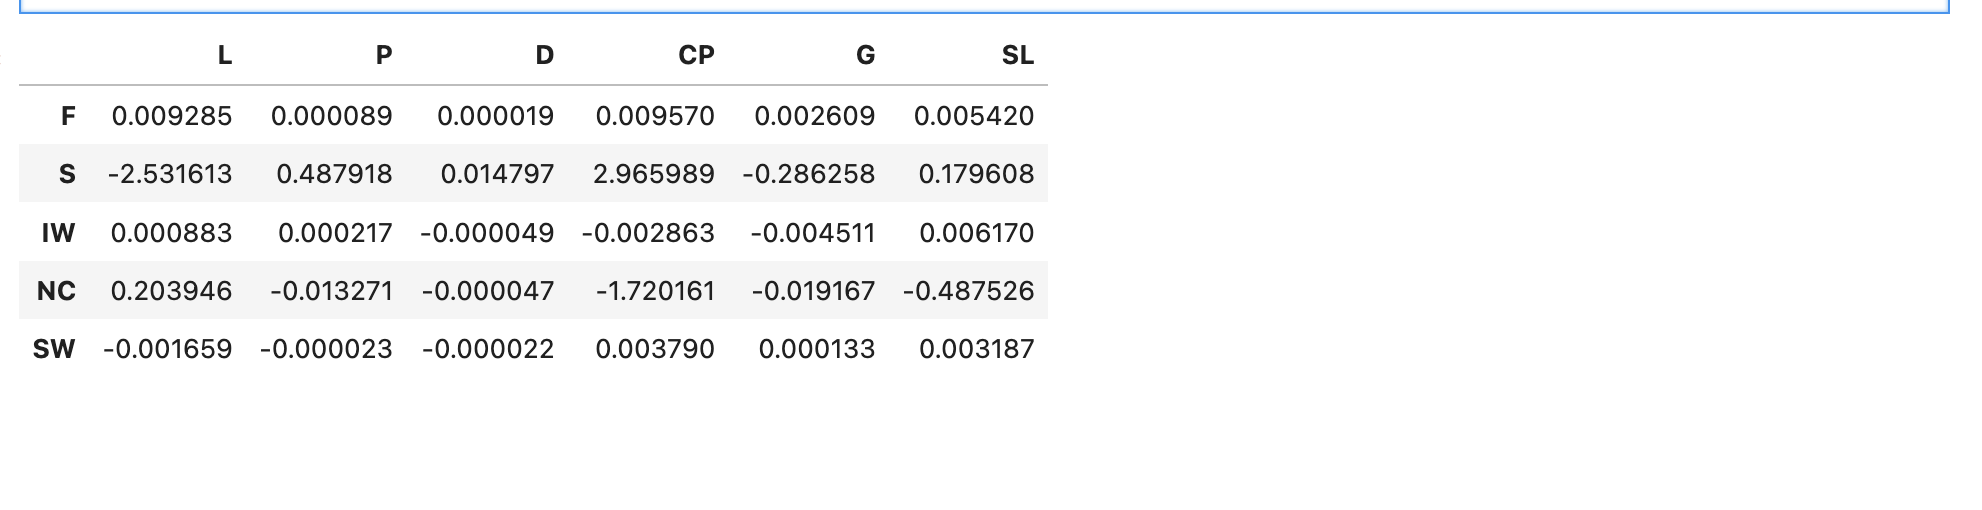